In [16]:
#Initial imports
import pandas as pd
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
linr = LinearRegression()
encoder = ce.OneHotEncoder()

In [3]:
#read in dataframe
df = pd.read_csv('../data/nyc/nyc-rent-2016.csv')

In [4]:
#convert 'created' column to datetime to make it useful
df['created'] = pd.to_datetime(df['created'], infer_datetime_format = True)

In [5]:
#Easiest way to remind myself of the column names
df.columns

Index(['bathrooms', 'bedrooms', 'created', 'description', 'display_address',
       'latitude', 'longitude', 'price', 'street_address', 'interest_level',
       'elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
       'doorman', 'dishwasher', 'no_fee', 'laundry_in_building',
       'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck',
       'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony',
       'swimming_pool', 'new_construction', 'exclusive', 'terrace', 'loft',
       'garden_patio', 'common_outdoor_space', 'wheelchair_access'],
      dtype='object')

In [6]:
df[(df['swimming_pool']==1)&(df['dogs_allowed']==1)]

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,...,high_speed_internet,balcony,swimming_pool,new_construction,exclusive,terrace,loft,garden_patio,common_outdoor_space,wheelchair_access
13,2.0,2,2016-04-09 01:22:11,Lincoln Square's premier full service building...,West 63rd Street,40.7707,-73.9817,6895,30 West 63rd Street,low,...,0,0,1,0,0,0,0,0,0,0
71,2.0,3,2016-04-10 02:41:58,"!!! NO FEE !!!It is a community-oriented, -fri...",North Moore St.,40.7196,-74.0109,6320,80 North Moore St.,low,...,1,0,1,0,0,0,0,0,0,0
75,2.0,2,2016-04-14 03:01:58,"Beautiful, corner 2 bedroom/2 bath with a sepa...",West 67th Street,40.7756,-73.9846,7000,200 West 67th Street,low,...,0,0,1,0,0,0,0,1,0,0
145,1.0,1,2016-04-24 05:28:09,NEW LUXURY BUILDING IN LONG ISLAND CITY. BE TH...,Center Blvd,40.7481,-73.9564,2983,4545 Center Blvd,medium,...,1,0,1,1,0,0,0,0,0,1
150,1.0,1,2016-04-02 01:28:23,"NO FEE South Facing with Balcony, Open Kitchen...",West 43rd Street,40.7612,-73.9978,3346,560 West 43rd Street,low,...,0,0,1,0,0,0,0,0,0,0
219,1.0,0,2016-04-24 02:32:40,Luxury studio with balcony open floor plan wit...,West 43rd Street,40.7612,-73.9978,2600,560 West 43rd Street,low,...,1,1,1,0,0,0,0,0,0,0
237,1.0,2,2016-04-12 02:36:32,The building is fully staffed with doormen and...,E 95 St.,40.7842,-73.9480,2900,205-235 E 95 St.,medium,...,0,0,1,0,0,0,0,0,0,0
256,1.0,2,2016-04-30 04:14:25,You will immediately notice the two California...,John Street,40.7081,-74.0065,3460,100 John Street,low,...,0,0,1,0,0,0,1,0,0,0
359,2.0,2,2016-04-19 02:54:17,"THE DIVERSIFIED, THE DISTINCTIVE, AND THE DIFF...",W 42 St.,40.7606,-73.9994,7000,610 W 42 St.,low,...,1,0,1,1,0,0,0,0,0,0
454,1.0,2,2016-04-27 06:22:31,"The Building, New York?s most important new re...",West 54th Street,40.7678,-73.9915,3175,550 West 54th Street,medium,...,0,0,1,0,0,0,0,1,0,0


In [45]:
features = ['swimming_pool','dogs_allowed']
df['pool_dogs'] = np.where((df['swimming_pool']==1)&(df['dogs_allowed']==1),1,0)

In [8]:
features = []
df['pool_dogs'].value_counts()

0    47080
1     1220
Name: pool_dogs, dtype: int64

In [9]:
df['social'] = (df['common_outdoor_space']+df['fitness_center']+df['swimming_pool']-
                df['exclusive'])

In [10]:
df['social'].value_counts()

 0    33538
 1     9726
 2     3202
-1     1794
 3       40
Name: social, dtype: int64

In [11]:
features = ['social','pool_dogs','doorman', 'bedrooms','bathrooms','hardwood_floors','laundry_in_unit']
target = 'price'
df['month'] = df['created'].dt.month
train = df[df['month']<6]
test = df[df['month']==6]

In [12]:
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [13]:
linr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
linr.coef_

array([  21.63006818,  -15.90274841,  688.05808515,  474.79913868,
       1276.28607232, -137.01548807,  434.22575305])

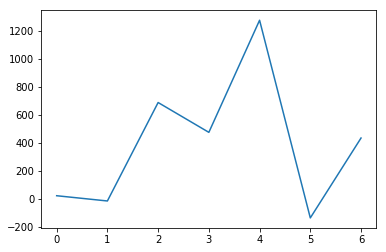

In [18]:
plt.plot(linr.coef_)

In [38]:
y_pred = linr.predict(X_test)
coefs = linr.coef_
squared_error = mean_squared_error(y_pred,y_test)
intercept = linr.intercept_
sses=[]
for i in coefs:
    sse = squared_error.sum()
    sses.append(sse)
    
hypotheses = pd.DataFrame({'Slope':coefs})
hypotheses['intercept'] = intercept
hypotheses['Sum of Square Errors'] = sses

hypotheses

,Slope,intercept,Sum of Square Errors
0,21.630068,908.477043,920660.940212
1,-15.902748,908.477043,920660.940212
2,688.058085,908.477043,920660.940212
3,474.799139,908.477043,920660.940212
4,1276.286072,908.477043,920660.940212
5,-137.015488,908.477043,920660.940212
6,434.225753,908.477043,920660.940212


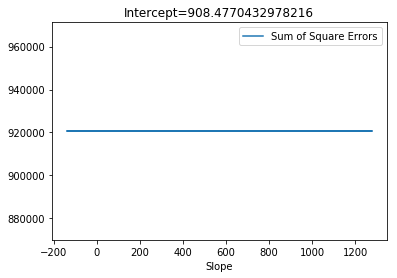

In [39]:
hypotheses.plot(x='Slope', y='Sum of Square Errors', 
                title=f'Intercept={intercept}');

In [20]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

In [21]:
mean_ae = mae(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Aboslute Error: {mean_ae}')
print(f'R2 Score: {r2}')

Mean Aboslute Error: 693.0443961168085
R2 Score: 0.5348954648041155


In [22]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\charl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
from nltk.stem import WordNetLemmatizer

In [25]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in nltk.word_tokenize(articles)]

In [26]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=LemmaTokenizer(),
                                   lowercase=True)

In [27]:
def lemmatize(text):
    text = text.split()    
    lemmatizer = WordNetLemmatizer()
    lem_words = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(lem_words)
    return text

In [28]:
#takes care of na's messing up the split function
df['description'] = df['description'].str.strip().fillna('')

In [29]:
# Remove extra white space
df['description_clean'] = df['description'].apply(lambda x: ' '.join(x.split()))

# Remove punctuation and numbers
df['description_clean'] = df['description_clean'].str.replace('[^\w\s]', ' ').str.replace('\d+', '')

# Convert to lower case
df['description_clean'] = df['description_clean'].str.lower()

In [30]:
df['description_clean'] = df['description_clean'].map(lambda x: lemmatize(x))

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer(ngram_range = (1,2),
                                max_df = 0.8, 
                                min_df = 2)

dtm_tf = tf_vectorizer.fit_transform(df['description_clean'])
dtm_feature_names = tf_vectorizer.get_feature_names()

In [32]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 10
lda_tf = LatentDirichletAllocation(n_components=n_topics, random_state=10)
lda_tf.fit(dtm_tf)

KeyboardInterrupt: 

In [ ]:
col_names = ["Topic {0}".format(x) for x in range(0, n_topics)]
topic_dist = lda_tf.transform(dtm_tf)
topic_df = pd.DataFrame(topic_dist, columns = col_names)

#Add the topics to the dataframe
df2 = pd.concat([df, topic_df], axis=1)

In [ ]:
df2.head()

In [38]:
linr2 = LinearRegression()

In [39]:
train = df2[df2['month']<6]
test = df2[df2['month']==6]

In [42]:
test.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,...,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,...,0.000606,0.000606,0.088324,0.000606,0.000606,0.000606,0.073753,0.000606,0.000606,0.833679
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
11,1.0,1,2016-06-03 03:21:22,Check out this one bedroom apartment in a grea...,W. 173rd Street,40.8448,-73.9396,1675,644 W. 173rd Street,low,...,0.000516,0.000516,0.000516,0.776787,0.000516,0.000516,0.000516,0.000516,0.219089,0.000516
14,1.0,1,2016-06-01 03:11:01,Spacious 1-Bedroom to fit King-sized bed comfo...,East 56th St..,40.7584,-73.9648,3050,315 East 56th St..,low,...,0.000562,0.000562,0.000562,0.000562,0.586879,0.000562,0.000562,0.000562,0.000562,0.408625
24,2.0,4,2016-06-07 04:39:56,SPRAWLING 2 BEDROOM FOUND! ENJOY THE LUXURY OF...,W 18 St.,40.7391,-73.9936,7400,30 W 18 St.,medium,...,0.000420,0.000420,0.000420,0.000420,0.046084,0.000420,0.000420,0.424037,0.000420,0.526938


In [40]:
df2.columns

Index(['bathrooms', 'bedrooms', 'created', 'description', 'display_address',
       'latitude', 'longitude', 'price', 'street_address', 'interest_level',
       'elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
       'doorman', 'dishwasher', 'no_fee', 'laundry_in_building',
       'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck',
       'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony',
       'swimming_pool', 'new_construction', 'exclusive', 'terrace', 'loft',
       'garden_patio', 'common_outdoor_space', 'wheelchair_access',
       'pool_dogs', 'social', 'month', 'description_clean', 'Topic 0',
       'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6',
       'Topic 7', 'Topic 8', 'Topic 9'],
      dtype='object')

In [43]:
features = ['Topic 0',
            'Topic 1', 
            'Topic 2', 
            'Topic 3', 
            'Topic 4', 
            'Topic 5', 
            'Topic 6',
            'Topic 7', 
            'Topic 8', 
            'Topic 9',
            'bedrooms',
            'bathrooms']
target = 'price'

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [44]:
linr2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
linr2.coef_

array([ 230.9902658 , -217.75384598,  353.21603381, -916.25564671,
        258.69439814,  391.99294492, -676.82902632,  671.99151053,
        222.32834606, -318.37498025,  459.93948936, 1369.62633737])

In [46]:
linr2.intercept_

1224.2356369901695

In [48]:
y_pred = linr2.predict(X_test)

In [49]:
mae(y_test,y_pred)

706.6289285195766

In [40]:
def configure_plotly_browser_state():
    import IPython
    display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [44]:
import itertools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

def viz3D(fitted_model, X, features, target='', num=100):
    """
    Visualize model predictions in 3D, for regression model fit on 2 features
    
    Parameters
    ----------
    fitted_model : scikit-learn model, already fitted
    X : pandas dataframe, which was used to fit model
    features : list of strings, column names of the 2 features
    target : string, name of target
    num : int, number of grid points for each feature
    
    References
    ----------
    https://plot.ly/python/3d-charts/
    """
    feature1, feature2 = features
    min1, max1 = X[feature1].min(), X[feature1].max()
    min2, max2 = X[feature2].min(), X[feature2].max()
    x1 = np.linspace(min1, max1, num)
    x2 = np.linspace(min2, max2, num)
    combos = list(itertools.product(x1, x2))
    Z = fitted_model.predict(combos).reshape(num, num)
    
    configure_plotly_browser_state()
    data = [go.Surface(x=x1, y=x2, z=Z)]
    layout = go.Layout(
        scene={'xaxis': {'title': feature1, 'range': [min1,max1], 'showticklabels': True}, 
               'yaxis': {'title': feature2, 'range': [min2,max2], 'showticklabels': True}, 
               'zaxis': {'title': target, 'showticklabels': True}}, 
    )
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)


In [46]:
viz3D(linr, X_train,features,target,1)

KeyError: 'swimming_pool'